In [6]:
# these are the libraries we need.
%matplotlib inline
import numpy as np
import pylab

# Average - "typical"

Once you have collected data, you might be interested in knowing the "average" or "typical". By "average" people ususally mean any of the following.

- the _mean_ (which is the sum of all values, divided by the number of values )
- the _median_ (which is the middle value, numerically )
- the _mode_ (which is the value occur most often )

Which of the above represents your "average" / "typical" is a subjective choice.

Let's generate some random data and try to do these operations. 

In [7]:
data = [ 41, 21, 5, 34, 23, 12, 121, 65, 32, 34, 11, 23 ]


I can plot these data using the marker _*_ in matplotlib/pylab.

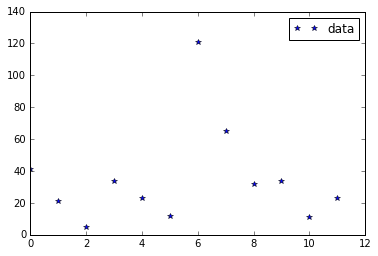

In [8]:
pylab.plot( data, '*', label = 'data' )
pylab.legend( )

In [9]:
np.mean( data )

35.166666666666664

In [10]:
np.median( data )

27.5

In [11]:
np.mode( data )

AttributeError: 'module' object has no attribute 'mode'

Oh, well. Numpy doesn't have __mode__ operation. You can use `scipy.stat` module. http://stackoverflow.com/questions/16330831/most-efficient-way-to-find-mode-in-numpy-array

In [14]:
import scipy.stats
mode = scipy.stats.mode( data, axis = None )
print mode

ModeResult(mode=array([23]), count=array([2]))


Let's plot all of it together.

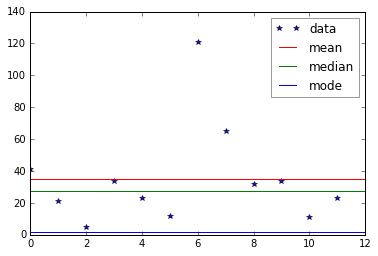

In [23]:
pylab.close()
pylab.plot( data, '*', label = 'data')
pylab.axhline( np.mean(data), label = 'mean', color = 'red' )
pylab.axhline( np.median(data), label = 'median', color = 'green')
pylab.axhline( mode[1], label = 'mode', color = 'blue')
pylab.legend( framealpha = 0.4 )

# Variance

Variance is a measure of "spread". Or, how different each sample is from the typical. So mean and variance goes hand in hand.

In this excercise, we are going to come up our own notion of variance to gain insight into this variable.

Our working definigion of the variance is the following: **How different each sample is from the "typical"**. Let's have some data to work with.

(array([ 6.,  3.,  0.,  5.,  3.,  2.,  6.,  3.,  1.,  1.]),
 array([-0.93136006, -0.74643317, -0.56150628, -0.3765794 , -0.19165251,
        -0.00672562,  0.17820127,  0.36312815,  0.54805504,  0.73298193,
         0.91790882]),
 <a list of 10 Patch objects>)

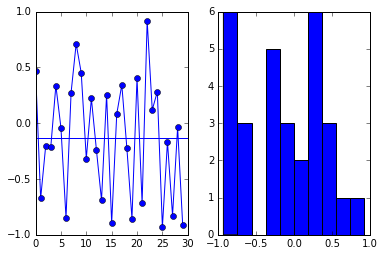

In [44]:
mydata = np.random.uniform(-1, 1, 30)
pylab.subplot(1, 2, 1)
pylab.plot( mydata, '-o' )
pylab.axhline( np.mean(mydata) )
pylab.subplot( 1, 2, 2)
pylab.hist( mydata )

I defined variance as the distance from the mean. 

In [45]:
variance = np.sum( mydata - np.mean(mydata) )
print( variance )

1.11022302463e-16


Well, why variance is close to zero! The problem is that some distance from mean are positive and others are negative and they are cancelling each other. To overcome this, we can turn everything in positive by taking the absolute value. And now our variance is following:

In [46]:
variance = np.sum( np.abs( mydata - np.mean(mydata)) )
print( variance )

13.5019270903


In my opinion, this is also a prefectly valid definition of variance to work with.  Then why people like to square the distance from mean and add it up and then take the square root? A nice article is here http://www.leeds.ac.uk/educol/documents/00003759.htm . 

All I have to show you the following. Following is how the 'standard' standard deviation and our standard deviation plots on small random samples.

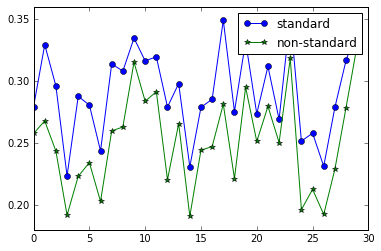

In [56]:
std1, std2 = [], []
for i in range(30):
    N = 10
    data = np.random.uniform( 0, 1, N )
    std1.append( np.std(data) )
    std2.append( np.sum( np.abs( data - data.mean() ) ) / N  )
pylab.plot( std1, '-o', label = 'standard' )
pylab.plot( std2, '-*', label = 'non-standard')
pylab.legend()

How about Poission process?

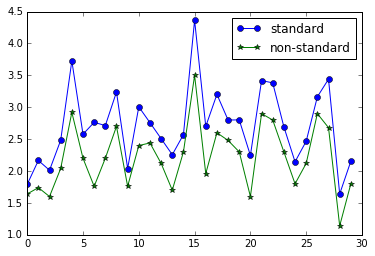

In [57]:
std1, std2 = [], []
for i in range(30):
    N = 10
    data = np.random.poisson( 10.0, N )
    std1.append( np.std(data) )
    std2.append( np.sum( np.abs( data - data.mean() ) ) / N  )
pylab.plot( std1, '-o', label = 'standard' )
pylab.plot( std2, '-*', label = 'non-standard')
pylab.legend()

# Summary

# Histogram

Now I am interested in knowing how many elements are there in different ranges such as 0-10, 10-20, 20-30 etc.. Or I want to plot a histogram.

pylab function `hist` can do that for you.

(array([ 3.,  3.,  1.,  3.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([   5.        ,   14.66666667,   24.33333333,   34.        ,
          43.66666667,   53.33333333,   63.        ,   72.66666667,
          82.33333333,   92.        ,  101.66666667,  111.33333333,  121.        ]),
 <a list of 12 Patch objects>)

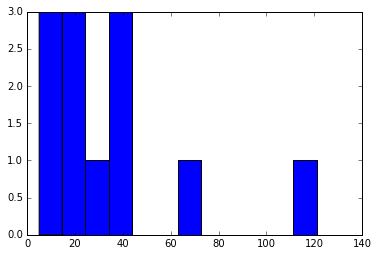

In [24]:
pylab.hist( data, bins = 12 ) 

As you can see, most data is clustered at the begining. We also can't comment on the distriubtion of the population from which this data has come from. Imagine if this was a class the number represents the marks obtained by students, it would be a nightmare for the professor to decide the grades based on statistics. 